In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part I – Question 1

**Question:**  
Identify the unique education levels and their frequencies. Group them into broader, meaningful categories (e.g., elementary, higher education, etc.). Explain the reasoning behind your mapping and support your answer with visual evidence.


In [ ]:
# ========================
# Step 1: Load Dataset
# ========================
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Set display for Jupyter
%matplotlib inline

# File path
file_path = "/home/shaon/DA-1/Assignment-1/M25_DA_A1_Dataset1.csv" 
export_dir = Path("./plots")
export_dir.mkdir(parents=True, exist_ok=True)

# Load data
df = pd.read_csv(file_path, skipinitialspace=True)

# Clean whitespace in string columns
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype(str).str.strip()

# Preview dataset
df.head()


,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


## Step 1: Identify unique education levels and their frequencies

The dataset contains an `Education` column that specifies the education level of each individual.  
We first extract **unique education levels** and count their frequencies.


In [ ]:

edu_counts = df['Education'].value_counts()
edu_pct = (df['Education'].value_counts(normalize=True) * 100).round(2)

edu_table = pd.DataFrame({"Count": edu_counts, "Percentage": edu_pct})
print("Unique Education Levels and Their Frequencies:")
display(edu_table)


Unique Education Levels and Their Frequencies:


,Count,Percentage
Education,,
HS-grad,15784,32.32
Some-college,10878,22.27
Bachelors,8025,16.43
Masters,2657,5.44
Assoc-voc,2061,4.22
11th,1812,3.71
Assoc-acdm,1601,3.28
10th,1389,2.84
7th-8th,955,1.96


### Visualization – Original Education Levels


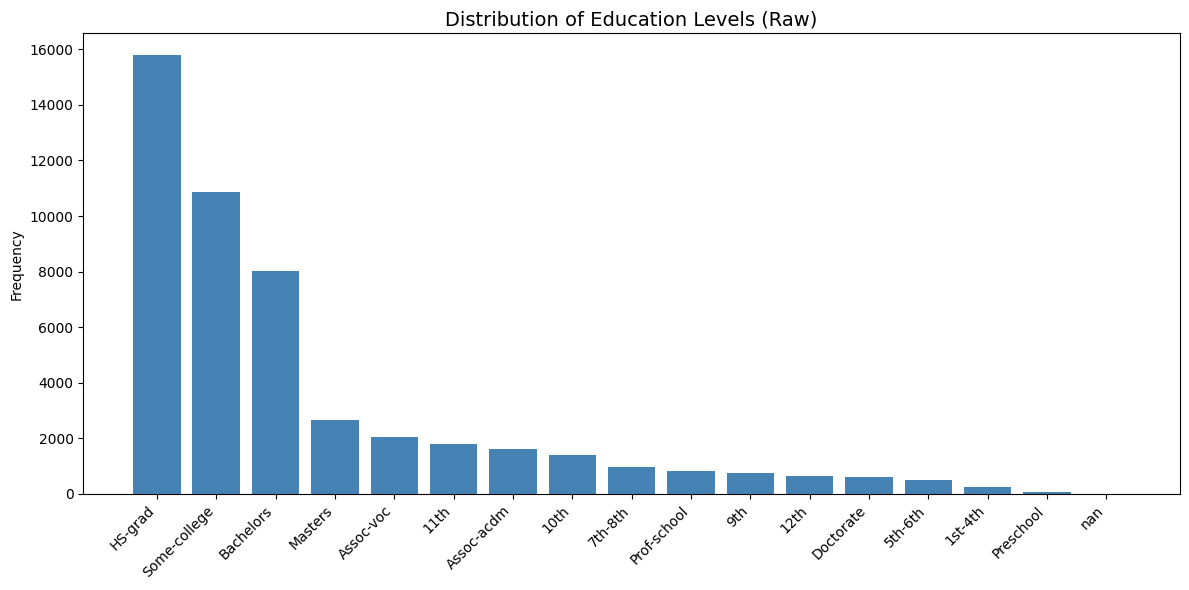

In [5]:
plt.figure(figsize=(12, 6))
plt.bar(edu_table.index, edu_table["Count"], color="steelblue")
plt.title("Distribution of Education Levels (Raw)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(export_dir / "education_raw_bar.png", dpi=200)
plt.show()


## Step 2: Group into broader, meaningful categories

To simplify analysis, we group detailed education levels into **broader categories**:

| Original Value                        | Grouped Category              |
|--------------------------------------|--------------------------------|
| Preschool, 1st-4th, 5th-6th, 7th-8th | Elementary                    |
| 9th, 10th, 11th, 12th                | Secondary                     |
| HS-grad                              | High School                   |
| Some-college                         | Higher Education (Non-degree) |
| Assoc-acdm, Assoc-voc                | Associate                     |
| Bachelors                            | Undergraduate                 |
| Masters, Doctorate, Prof-school      | Postgraduate                  |

### **Reasoning**
- **Elementary**: Early schooling before high school.
- **Secondary**: High school years without completion.
- **High School**: Completed high school diploma.
- **Higher Ed (Non-degree)**: Some college courses but no degree.
- **Associate**: Two-year college programs.
- **Undergraduate**: Bachelor's degree.
- **Postgraduate**: Advanced degrees (Masters, Doctorate, Professional school).


In [6]:
education_mapping = {
    "Preschool": "Elementary",
    "1st-4th": "Elementary",
    "5th-6th": "Elementary",
    "7th-8th": "Elementary",
    "9th": "Secondary",
    "10th": "Secondary",
    "11th": "Secondary",
    "12th": "Secondary",
    "HS-grad": "High School",
    "Some-college": "Higher Education (Non-degree)",
    "Assoc-voc": "Associate",
    "Assoc-acdm": "Associate",
    "Bachelors": "Undergraduate",
    "Masters": "Postgraduate",
    "Doctorate": "Postgraduate",
    "Prof-school": "Postgraduate",
}

# Map to grouped categories
df["Education_Group"] = df["Education"].map(education_mapping).fillna("Other/Unknown")

# Check if any unmapped values exist
unmapped = sorted(set(df["Education"]) - set(education_mapping.keys()))
if unmapped:
    print("Unmapped values (set to 'Other/Unknown'):", unmapped)

# Grouped counts
group_counts = df["Education_Group"].value_counts()
group_pct = (df["Education_Group"].value_counts(normalize=True) * 100).round(2)

group_table = pd.DataFrame({"Count": group_counts, "Percentage": group_pct})
print("\nGrouped Education Categories and Their Frequencies:")
display(group_table)


Unmapped values (set to 'Other/Unknown'): ['nan']

Grouped Education Categories and Their Frequencies:


,Count,Percentage
Education_Group,,
High School,15784,32.32
Higher Education (Non-degree),10878,22.27
Undergraduate,8025,16.43
Secondary,4614,9.45
Postgraduate,4085,8.36
Associate,3662,7.50
Elementary,1794,3.67
Other/Unknown,1,0.00


### Visualization – Grouped Education Categories


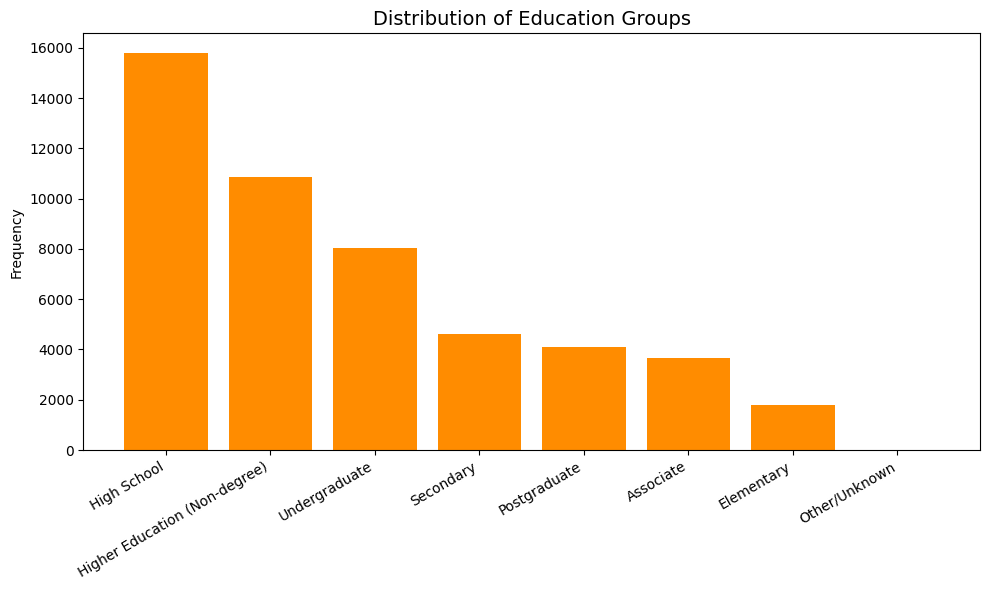

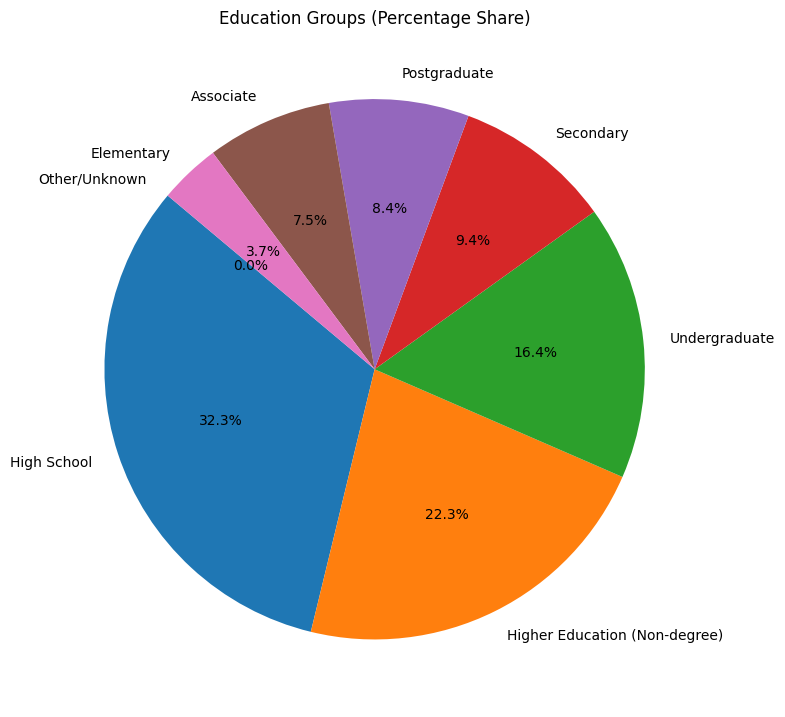

In [7]:
# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(group_table.index, group_table["Count"], color="darkorange")
plt.title("Distribution of Education Groups", fontsize=14)
plt.xticks(rotation=30, ha="right")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(export_dir / "education_grouped_bar.png", dpi=200)
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    group_table["Count"].values,
    labels=group_table.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Education Groups (Percentage Share)")
plt.tight_layout()
plt.savefig(export_dir / "education_grouped_pie.png", dpi=200)
plt.show()


## Summary

- The dataset originally contained multiple granular education levels such as *Bachelors, HS-grad, Some-college, 11th, Masters, etc.*
- We grouped them into **7 broader categories**: Elementary, Secondary, High School, Higher Education (Non-degree), Associate, Undergraduate, and Postgraduate.
- This grouping makes it easier to interpret and compare education levels meaningfully.
- The visualizations (bar chart and pie chart) clearly show the distribution of these broader categories.
